In [49]:
%matplotlib inline
import pandas as pd
from matplotlib import pylab as plt

## Import genome file

In [70]:
data = pd.read_csv('p_aeru/PATRIC_genome_p_aeru.txt', delimiter="\t", dtype={'Genome_ID':str})
len(data.index)


2256

### QCQA 1: Remove rows with 'Plasmid' and empty Genome status entries

In [71]:

data=data[data.Genome_Status != 'Plasmid']
data=data[data.Genome_Status.notnull()]
len(data.index)

2256

### QCQA 2: Remove MLST without MLST values i.e. empty

In [ ]:
data=data[data.MLST.notnull()]
len(data.index)

In [35]:
keep = []
for idx, group in data.groupby(['MLST']):
    if len(group) > 50:
        keep.extend(group[:50].index)
    else:
        keep.extend(group.index)

In [36]:
for idx, group in data.loc[keep].groupby('MLST'):
    if len(group) > 5 0:
        print idx, len(group)

In [37]:
data=data.loc[keep]
data

,Genome_ID,Genome_Name,Organism_Name,NCBI_Taxon_ID,Genome_Status,Strain,Serovar,Biovar,Pathovar,MLST,...,Comments,Additional_Metadata,Coarse_Consistency,Fine_Consistency,Checkm_Completeness,Checkm_Contamination,Genome_Quality_Flags,Genome_Quality,Date_Inserted,Date_Modified
1140,287.5759,Pseudomonas aeruginosa strain HIAE_PA12,NaN,287,WGS,HIAE_PA12,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.10,...,The draft genomes of 20 strains of Pseudomonas...,collected_by:Hospital Israelita Albert Einstein,99.8,99.3,100.0,NaN,NaN,Good,2018-05-30T20:03:32.572Z,2018-05-30T20:03:32.572Z
391,287.1229,Pseudomonas aeruginosa AZPAE12411,NaN,287,WGS,AZPAE12411,O9,NaN,NaN,MLST.Pseudomonas_aeruginosa.1011,...,Genome sequencing of recent Pseudomonas aerugi...,full length oprd:yes,99.8,99.3,100.0,NaN,NaN,Good,2015-03-12T13:51:08.091Z,2015-03-16T03:17:09.594Z
1809,287.7637,Pseudomonas aeruginosa strain PA-W2,NaN,287,WGS,PA-W2,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1014,...,The International Pseudomonas aeruginosa Conso...,biomaterial_provider:Stephan Heeb;sample_type:...,99.9,99.3,NaN,NaN,NaN,Good,2019-01-30T06:32:11.811Z,2019-01-30T06:32:11.811Z
13,1280938.3,Pseudomonas aeruginosa B136-33,Pseudomonas aeruginosa B136-33,1280938,Complete,B136-33,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1024,...,Characterization of a Psedomonas aeruginosa is...,NaN,97.8,96.7,99.1,0.6,NaN,Good,2014-12-08T22:12:36.399Z,2015-03-16T03:17:09.594Z
1195,287.6352,Pseudomonas aeruginosa strain PA82 strain Not ...,NaN,287,WGS,Not applicable,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1027,...,This project aims to examine antibiotic resist...,collected_by:LVPEI,99.6,98.8,100.0,0.3,NaN,Good,2018-09-29T21:24:19.199Z,2018-09-29T21:24:19.199Z
2170,287.904,Pseudomonas aeruginosa AZPAE15014,NaN,287,WGS,AZPAE15014,O4,NaN,NaN,MLST.Pseudomonas_aeruginosa.1033,...,Genome sequencing of recent Pseudomonas aerugi...,full length oprd:yes,99.6,99.3,99.1,NaN,NaN,Good,2015-03-12T13:52:16.393Z,2015-03-16T03:17:09.594Z
748,287.2580,Pseudomonas aeruginosa strain IOMTU 133,NaN,287,Complete,IOMTU 133,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1047,...,Multidrug-resistant Pseudomonas aeruginosa has...,NaN,99.6,98.8,100.0,0.9,NaN,Good,2016-03-01T07:56:07.016Z,2016-03-01T07:56:07.016Z
1970,287.7897,Pseudomonas aeruginosa strain Zw75_2,NaN,287,WGS,Zw75_2,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1050,...,The International Pseudomonas aeruginosa Conso...,sample_type:bacterial culture;biomaterial_prov...,99.6,98.4,NaN,NaN,NaN,Good,2019-01-31T20:21:38.444Z,2019-01-31T20:21:38.444Z
348,287.1186,Pseudomonas aeruginosa AZPAE14410,NaN,287,WGS,AZPAE14410,O2_group,NaN,NaN,MLST.Pseudomonas_aeruginosa.1053,...,Genome sequencing of recent Pseudomonas aerugi...,full length oprd:yes,99.9,99.9,100.0,NaN,NaN,Good,2015-03-12T13:50:48.796Z,2015-03-16T03:17:09.594Z
1235,287.6394,Pseudomonas aeruginosa strain PABL076,NaN,287,WGS,PABL076,NaN,NaN,NaN,MLST.Pseudomonas_aeruginosa.1058,...,Pseudomonas aeruginosa isolates collected from...,NaN,99.9,98.4,100.0,NaN,NaN,Good,2018-09-30T22:32:11.024Z,2018-09-30T22:32:11.024Z


### QCQA 3: Contigs Check

(0, 1000)

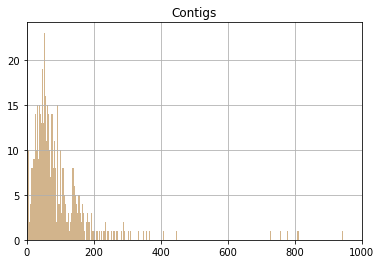

In [55]:
#Plot histogram for Contigs column
ax=data.hist(column='Contigs',bins=300, color="Tan")
plt.xlim([0,1000])

In [56]:
# Remove MLST without MLST values i.e. empty
data=data[data.Contigs <100]
#data
len(data.index)

342

In [57]:
data_mlst= data.groupby('MLST').count().sort_values('Genome_ID')
data_mlst

,Genome_ID,Genome_Name,Organism_Name,NCBI_Taxon_ID,Genome_Status,Strain,Serovar,Biovar,Pathovar,Other_Typing,...,Comments,Additional_Metadata,Coarse_Consistency,Fine_Consistency,Checkm_Completeness,Checkm_Contamination,Genome_Quality_Flags,Genome_Quality,Date_Inserted,Date_Modified
MLST,,,,,,,,,,,,,,,,,,,,,
MLST.Enterobacter_cloacae.734,1,1,0,1,1,1,0,0,0,0,...,1,0,1,1,1,1,0,1,1,1
MLST.Enterobacter_cloacae.594,1,1,0,1,1,1,0,0,0,0,...,1,0,1,1,1,0,0,1,1,1
MLST.Enterobacter_cloacae.592,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
MLST.Enterobacter_cloacae.773,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
MLST.Enterobacter_cloacae.774,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
MLST.Enterobacter_cloacae.775,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1
MLST.Enterobacter_cloacae.544,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
MLST.Enterobacter_cloacae.54,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1
MLST.Enterobacter_cloacae.777,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1


''

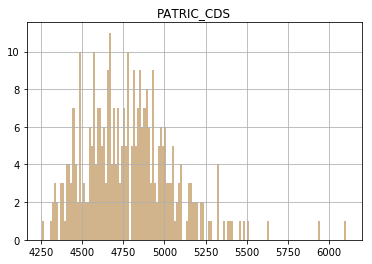

In [58]:
data.hist(column='PATRIC_CDS',bins=150, color="Tan")
;

In [59]:
cds_mean=data.PATRIC_CDS.mean()
cds_std=data.PATRIC_CDS.std()
print cds_mean
cds_std

4783.82748538


267.6017789307712

### QCQA 4: Remove CDS with number out of range mean.values.CDS

In [60]:
#Remove CDS with number out of range mean.values.CDS
data=data[data.PATRIC_CDS.between(data.PATRIC_CDS.mean()-2*cds_std,data.PATRIC_CDS.mean()+2*cds_std,inclusive=True)]
len(data.index)

330

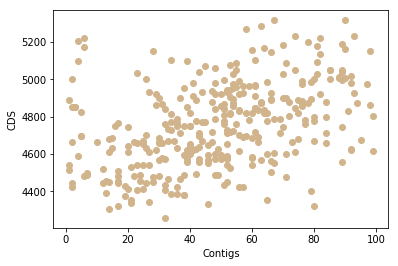

''

In [62]:
plt.scatter(data.Contigs, data.PATRIC_CDS, color="Tan")
plt.xlabel('Contigs')
plt.ylabel('CDS')
plt.show()
;

### Export output

In [63]:
data.to_csv('e_coli/e_cloacae_qcqa_out.csv', index=False)
data.Genome_ID.to_csv('e_cloacae/e_cloacae_qcqa_genomes.csv', index=False)

/home/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app
